In [62]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import cross_validation
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LassoLarsCV
import sklearn
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile, f_regression, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import xgboost as xg
from tpot.builtins import StackingEstimator
import seaborn as sns
import itertools
import pickle

%matplotlib inline

In [11]:
df = pd.read_csv("../results/melted_hackseq.csv")
df = df.drop(axis=1, labels=["Transcript", "Target gene", "30mer"])
df

,GC count,Amino Acid Cut position,NGGX_pd.Order2_P0,NGGX_pd.Order2_P1,NGGX_pd.Order2_P10,NGGX_pd.Order2_P11,NGGX_pd.Order2_P12,NGGX_pd.Order2_P13,NGGX_pd.Order2_P14,NGGX_pd.Order2_P15,...,_pi.Order1_P3,Percent Peptide,Tm global_False,5mer_end_False,8mer_middle_False,5mer_start_False,GC < 10,Strand,drug,lfc
0,13.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,13.0,False,71.954952,-23.661612,14.686540,-33.479130,0,antisense,AZD_200nM,2.896417
1,14.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.0,False,70.136401,-31.269027,15.830283,-31.374070,0,antisense,AZD_200nM,2.867987
2,10.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,True,64.729741,-29.148801,6.039043,-31.843549,0,sense,AZD_200nM,2.779515
3,11.0,241.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,14.0,False,65.657931,-32.481356,10.267112,-50.588522,0,antisense,AZD_200nM,2.301829
4,13.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,False,69.998236,-38.581712,17.927823,-10.007838,0,sense,AZD_200nM,2.255644
5,12.0,244.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,False,65.261154,-33.479130,19.039549,-25.595133,0,antisense,AZD_200nM,2.115588
6,10.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,True,62.772844,-26.148099,4.165713,-30.401277,0,antisense,AZD_200nM,2.066618
7,11.0,180.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,False,67.936664,-32.704164,7.335508,-25.785900,0,antisense,AZD_200nM,2.040182
8,13.0,116.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,11.0,True,70.542243,-34.839040,21.391726,-39.048828,0,sense,AZD_200nM,2.025409
9,10.0,278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,False,64.483011,-44.946409,12.161792,-32.602279,0,sense,AZD_200nM,2.002125


In [12]:
dummy_df = pd.get_dummies(df).dropna(axis=0)
dummy_df.shape

(12984, 155)

In [13]:
cols = dummy_df.columns.tolist()
cols.append(cols.pop(cols.index('lfc')))
dummy_df = dummy_df.reindex(columns= cols)

In [15]:
X, y = dummy_df.iloc[:,:-1].values, dummy_df.iloc[:,-1].values

In [16]:
model = GradientBoostingRegressor()
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(cross_val))/len(cross_val)

/home/deadhand/anaconda3/envs/hackseq_2017/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/deadhand/anaconda3/envs/hackseq_2017/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/deadhand/anaconda3/envs/hackseq_2017/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/deadhand/anaconda3/envs/hackseq_2017/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_er

3.0416118823251481

In [25]:
xg1000_model = xg.XGBRegressor(n_estimators=1000)
xg_cross_val = cross_validation.cross_val_score(estimator=xg1000_model, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(xg_cross_val))/len(xg_cross_val)

2.2663021115625583

In [23]:
iteration1 = make_pipeline(
    VarianceThreshold(threshold=0.05),
    GradientBoostingRegressor(alpha=0.8, 
                              learning_rate=0.1, 
                              loss="huber",
                              max_depth=7,
                              max_features=0.15,
                              min_samples_leaf=8,
                              min_samples_split=9,
                              n_estimators=100,
                              subsample=0.85)
)
i1_cross_val = cross_validation.cross_val_score(estimator=iteration1, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i1_cross_val))/len(i1_cross_val)

2.3551667579785436

In [24]:
iteration2 = GradientBoostingRegressor(alpha=0.8, 
                                       learning_rate=0.1, 
                                       loss="huber", 
                                       max_depth=7, 
                                       max_features=0.15, 
                                       min_samples_leaf=8, 
                                       min_samples_split=9, 
                                       n_estimators=100, 
                                       subsample=0.85)

i2_cross_val = cross_validation.cross_val_score(estimator=iteration2, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i2_cross_val))/len(i2_cross_val)

2.2760735685965594

In [26]:
iteration3 = GradientBoostingRegressor(alpha=0.8, 
                                       learning_rate=0.5, 
                                       loss="huber", 
                                       max_depth=7, 
                                       max_features=0.15, 
                                       min_samples_leaf=8, 
                                       min_samples_split=9, 
                                       n_estimators=100, 
                                       subsample=0.85)

i3_cross_val = cross_validation.cross_val_score(estimator=iteration3, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i3_cross_val))/len(i3_cross_val)

2.1568388969777064

In [29]:
iteration4 = make_pipeline(
    StackingEstimator(estimator=xg.XGBRegressor(learning_rate=0.5, max_depth=8, min_child_weight=11, n_estimators=100, nthread=1, subsample=0.8)),
    GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="huber", max_depth=7, max_features=0.15, min_samples_leaf=8, min_samples_split=9, n_estimators=100, subsample=0.85)
)


i4_cross_val = cross_validation.cross_val_score(estimator=iteration4, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i4_cross_val))/len(i4_cross_val)

2.041018152862363

In [31]:
iteration5 = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(alpha=0.95, learning_rate=0.1, loss="huber", max_depth=9, max_features=0.15, min_samples_leaf=8, min_samples_split=9, n_estimators=100, subsample=0.85)
)
i5_cross_val = cross_validation.cross_val_score(estimator=iteration5, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i5_cross_val))/len(i5_cross_val)

/home/deadhand/anaconda3/envs/hackseq_2017/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


2.0040598718708393

In [33]:
iteration6 = GradientBoostingRegressor(alpha=0.95, 
                                       learning_rate=0.1, 
                                       loss="huber", 
                                       max_depth=9, 
                                       max_features=0.15, 
                                       min_samples_leaf=8, 
                                       min_samples_split=9, 
                                       n_estimators=100, 
                                       subsample=0.85)

i6_cross_val = cross_validation.cross_val_score(estimator=iteration6, X=X, y=y, cv = 5, scoring="neg_mean_squared_error")
sum(abs(i6_cross_val))/len(i6_cross_val)

1.9597331516601142

In [34]:
cross_vals = [cross_val, xg1000_cross_val, i1_cross_val, i2_cross_val, i3_cross_val, i4_cross_val, i5_cross_val, i6_cross_val]

In [37]:
mean_cross_vals = [abs(np.mean(cross_val)) for cross_val in cross_vals]

In [38]:
sd_cross_vals = [abs(np.std(cross_val)) for cross_val in cross_vals]

In [57]:
pd.DataFrame(zip(names, cross_vals), columns=["Iteration", "MSE"]

TypeError: unhashable type: 'list'

In [64]:
pickle.dump([names, cross_vals], open("cross_vals.pickle", "wb+"))

In [45]:
experiment_df = pd.DataFrame({"Experiment": names,
             "Mean": mean_cross_vals,
             "Standard Deviation": sd_cross_vals})

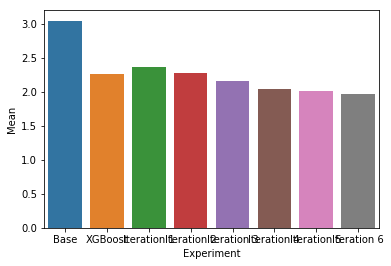

In [50]:
sns.barplot(x = "Experiment", 
            y = "Mean",
            ci = "Standard Deviation",
            data=experiment_df)